In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df=pd.read_csv("Data/Real-Data/Real_Combine.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,24.5,32.6,19.5,1010.7,65.0,6.3,3.0,7.6,284.795833
1,23.1,32.8,16.1,1011.9,62.0,6.3,1.3,5.4,219.720833
2,21.8,32.2,14.4,1012.7,59.0,5.5,1.9,7.6,182.187500
3,16.4,30.7,7.5,1013.7,59.0,5.8,1.1,3.5,154.037500
4,18.5,29.5,9.0,1014.3,66.0,5.5,1.7,9.4,223.208333


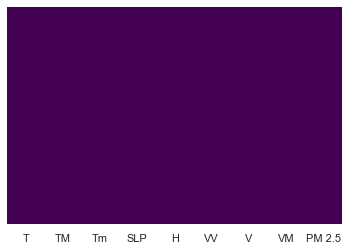

In [4]:
# Check for Null Values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False,
)

In [5]:
df[df['PM 2.5'].isnull()]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
182,20.5,29.3,14.2,1014.1,69.0,6.3,0.9,5.4,NaN
1092,16.4,26.4,6.9,1019.3,51.0,6.9,0.9,5.4,NaN


In [6]:
df['PM 2.5'].fillna((df['PM 2.5'].mean()),inplace=True)

In [7]:
X=df.iloc[:,:-1] # InDependent Feature
y=df.iloc[:,-1]  # Dependent Feature

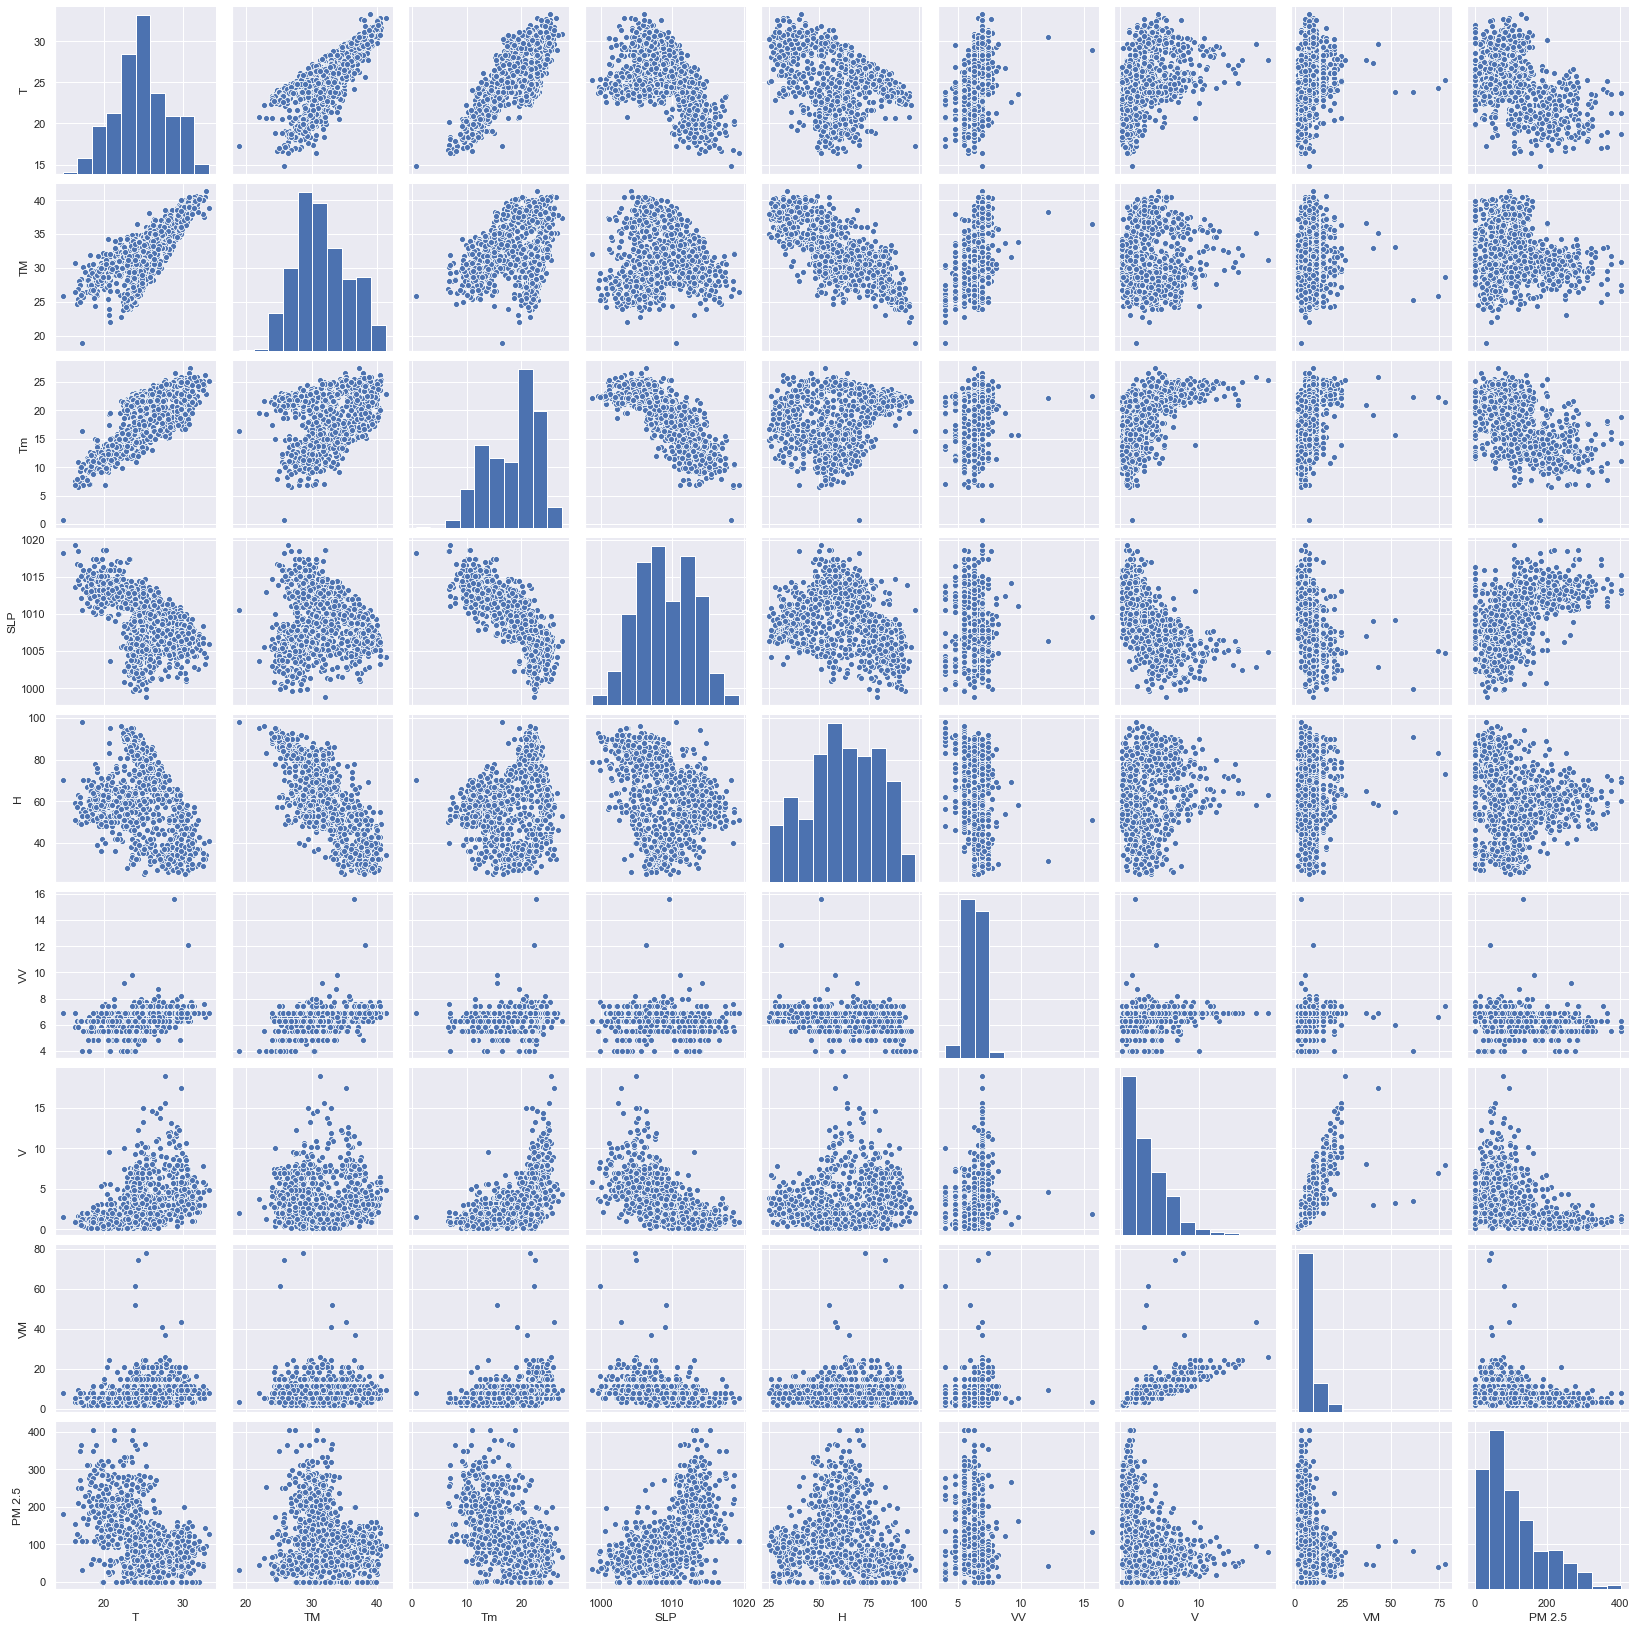

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.753239,0.742937,-0.574583,-0.326990,0.415846,0.393402,0.246274,-0.441488
TM,0.753239,1.000000,0.190468,-0.065981,-0.767216,0.350086,0.011148,0.008104,-0.064812
Tm,0.742937,0.190468,1.000000,-0.811060,0.334111,0.263140,0.610858,0.376319,-0.589994
SLP,-0.574583,-0.065981,-0.811060,1.000000,-0.328667,-0.207121,-0.638533,-0.413226,0.580128
H,-0.326990,-0.767216,0.334111,-0.328667,1.000000,-0.224937,0.208726,0.120700,-0.202671
VV,0.415846,0.350086,0.263140,-0.207121,-0.224937,1.000000,0.266602,0.160725,-0.221833
V,0.393402,0.011148,0.610858,-0.638533,0.208726,0.266602,1.000000,0.696432,-0.440549
VM,0.246274,0.008104,0.376319,-0.413226,0.120700,0.160725,0.696432,1.000000,-0.302753
PM 2.5,-0.441488,-0.064812,-0.589994,0.580128,-0.202671,-0.221833,-0.440549,-0.302753,1.000000


## Correlation Matrix With Heatmap

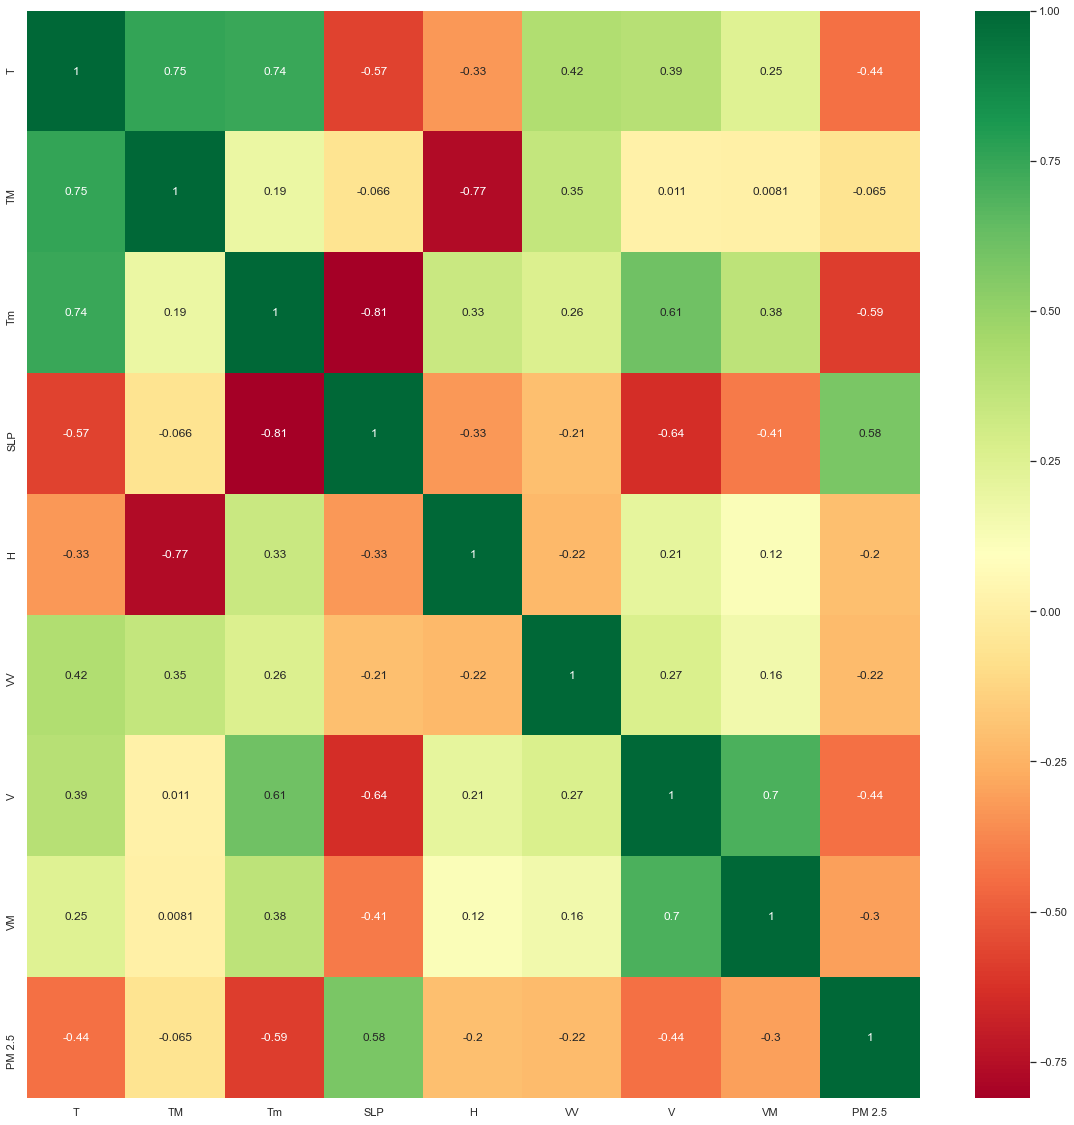

In [10]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

## Feature Importances

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [13]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,24.5,32.6,19.5,1010.7,65.0,6.3,3.0,7.6
1,23.1,32.8,16.1,1011.9,62.0,6.3,1.3,5.4
2,21.8,32.2,14.4,1012.7,59.0,5.5,1.9,7.6
3,16.4,30.7,7.5,1013.7,59.0,5.8,1.1,3.5
4,18.5,29.5,9.0,1014.3,66.0,5.5,1.7,9.4


In [14]:
y.head()

0    284.795833
1    219.720833
2    182.187500
3    154.037500
4    223.208333
Name: PM 2.5, dtype: float64

In [15]:
print(model.feature_importances_)

[0.13964672 0.08845958 0.2087957  0.21486954 0.12467381 0.05075606
 0.12400384 0.04879474]


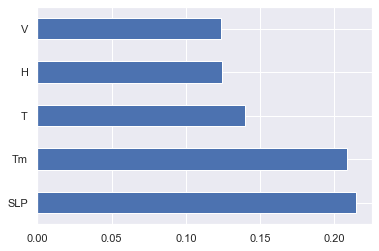

In [16]:
# Plot for feature_importances_ for better visualisation
feat_importance= pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

## Random Forest

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
y_pred = reg_rf.predict(X_test)

In [20]:
reg_rf.score(X_train, y_train)

0.9245263218738643

In [21]:
reg_rf.score(X_test, y_test)

0.5474489182011926

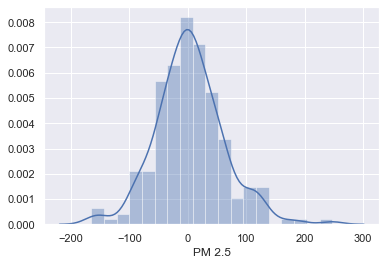

In [22]:
sns.distplot(y_test-y_pred)
plt.show()

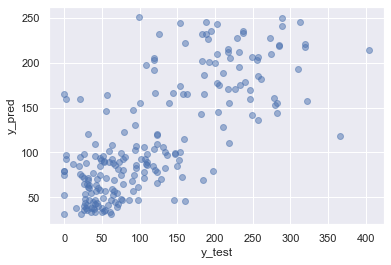

In [23]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 44.08102410531301
MSE: 3525.8343982579277
RMSE: 59.378736920365085


In [26]:
metrics.r2_score(y_test, y_pred)

0.5474489182011926

## Hyperparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [29]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [30]:
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [31]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [33]:
prediction = rf_random.predict(X_test)

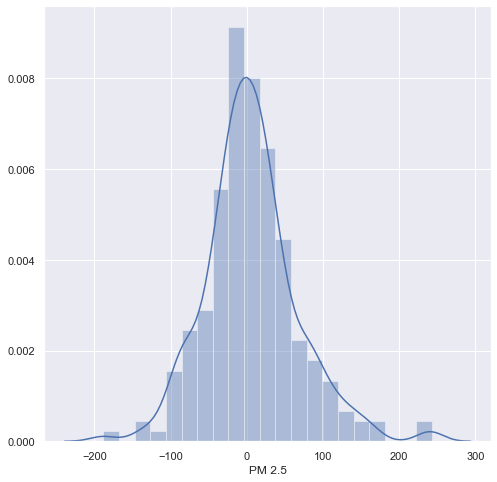

In [34]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

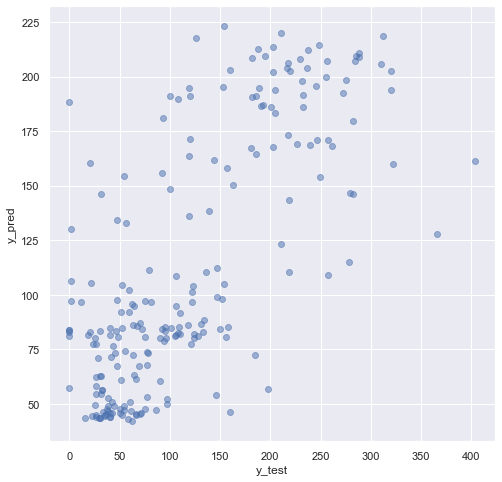

In [35]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 44.69623253542863
MSE: 3721.380090216548
RMSE: 61.00311541402249


## Save the model to reuse it again

In [40]:
import pickle
# open a file, where you ant to store the data
file = open('Random_forest_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [41]:
model = open('Random_forest_model.pkl','rb')
forest = pickle.load(model)

In [42]:
y_prediction = forest.predict(X_test)

In [43]:
metrics.r2_score(y_test, y_prediction)

0.5223500608978848